In [52]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
from jax import jit, vmap, grad
from jax.lax import scan
from scipy.special import erfcx as sc_erfcx
from scipy.special import wofz as sc_wofz
from jax.scipy.special import erfc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

from exojax.scipy.special import erfcx, rewofz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
erfcx(-4.0),sc_erfcx(-4.0)

(DeviceArray(17772222., dtype=float32), 17772220.904016286)

In [54]:
%timeit erfcx(1.0)

258 µs ± 9.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
%timeit sc_erfcx(1.0)

469 ns ± 3.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
N=10000
#xv=jnp.linspace(-10.0,100.0,N)
#xvc=np.linspace(-10.0,100.0,N)
xv=jnp.logspace(-5,5,N)
xvc=np.logspace(-5,5,N)

In [9]:
verfcx=vmap(erfcx)
%timeit verfcx(xv)

369 µs ± 6.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
d=(verfcx(xv) - sc_erfcx(xvc))/ sc_erfcx(xvc)

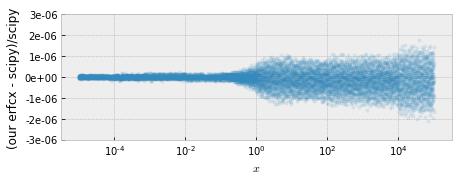

In [11]:
from matplotlib.ticker import FormatStrFormatter

fig=plt.figure(figsize=(7,2.3))
ax=fig.add_subplot(111)
ax.plot(xvc,d,".",alpha=0.1)
ax.yaxis.set_major_formatter(FormatStrFormatter("%1.e"))
plt.ylabel("(our erfcx - scipy)/scipy")
plt.xscale("log")
plt.xlabel("$x$")
plt.ylim(-3.e-6,3.e-6)
plt.savefig("erfcx.pdf", bbox_inches="tight", pad_inches=0.0)

In [12]:
N=100000
xv=jnp.linspace(-10.0,100.0,N)
verfcx=vmap(erfcx)
%timeit verfcx(xv)

379 µs ± 7.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
import matplotlib.pyplot as plt
xv=jnp.linspace(-10.0,10.0,N)

In [39]:
vrewofz=vmap(rewofz,(0,None),0)

In [30]:
# xmax=nend/2

In [31]:
rewofz(502.0,20)

DeviceArray(2.590563e-07, dtype=float32)

In [32]:

gvvrewofz=vmap(grad(rewofz,argnums=0),(0,None),0)


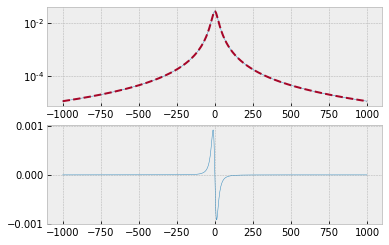

In [56]:

N=1000
xv=jnp.linspace(-1000,1000,N)
xvc=np.linspace(-1000,1000,N)


fig=plt.figure()
ax=fig.add_subplot(211)
ax.plot(xv,vrewofz(xv,20),lw=0.5)
ax.plot(xvc,sc_wofz(xvc+20*(1j)).real,ls="dashed")
plt.yscale("log")
ax=fig.add_subplot(212)
ax.plot(xv,gvvrewofz(xv,20),lw=0.5)


In [41]:
N=10000
xv=jnp.linspace(-10.0,10.0,N)
xvc=np.linspace(-10.0,10.0,N)
%timeit vrewofz(xv,1.0)
%timeit sc_wofz(xvc+1.0*(1j)).real

590 µs ± 148 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.21 ms ± 56.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [272]:
N=10000
xv=jnp.linspace(-10.0,10.0,N)
xvc=np.linspace(-10.0,10.0,N)
%timeit gvvrewofz(xv,20)

3.68 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


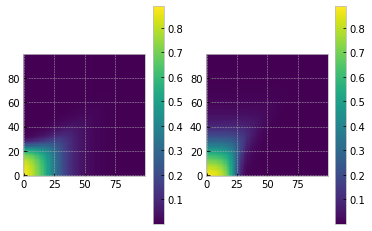

In [43]:
Na=100

xarrv=jnp.logspace(-1,3.3,Na)
xarr=xarrv[:,None]*jnp.ones((Na,Na))

aarrv=jnp.logspace(-1,3.3,Na)
aarr=aarrv[None,:]*jnp.ones((Na,Na))

def H(a,x):
    z=x+(1j)*a
    w = sc_wofz(z)
    return w.real

vrewofz=vmap(rewofz,(0,None),0)
def fvrewofz(a):
    return vrewofz(xarrv,a)
vfvrewofz=vmap(fvrewofz,0,0)

fig=plt.figure()
ax=fig.add_subplot(121)
c=ax.imshow(H(aarr,xarr))
plt.colorbar(c)
plt.gca().invert_yaxis()
ax=fig.add_subplot(122)
c2=ax.imshow(vfvrewofz(aarrv).T)
plt.colorbar(c2)
plt.gca().invert_yaxis()

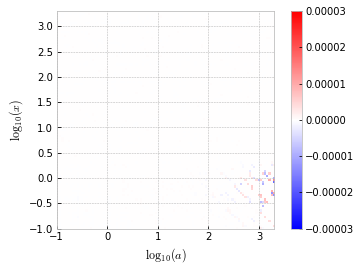

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111)
#c=ax.imshow(np.log10(np.abs(H(aarr,xarr)-Tc(aarr,xarr))/H(aarr,xarr)),cmap="bwr",vmin=-1,vmax=1)
#c=ax.imshow(H(aarr,xarr))
#c=ax.imshow(vfvrewofz(aarrv))
c=ax.imshow((H(aarr,xarr)-vfvrewofz(aarrv).T)/H(aarr,xarr),vmin=-3.e-5,vmax=3.e-5,
            cmap="bwr",extent=([-1,3.3,3.3,-1]))
plt.ylabel("$\log_{10}(x)$")
plt.xlabel("$\log_{10}(a)$")
plt.colorbar(c)
plt.gca().invert_yaxis()

In [51]:
gvvrewofz=vmap(grad(rewofz,argnums=0),(0,None),0)
N=10000
xv=jnp.linspace(-10.0,10.0,N)
%timeit gvvrewofz(xv,20)

3.41 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
def imwofz(x, y):
    """ Imwofz                                                                                   
    Params:                                                                             
        x: x < nend/2                                                                   
        y:                                                                              
                                                                                        
    Return:                                                                             
        f: Real(wofz(x+iy))                                                             
    """                                                                                 
    nend=4000                                                                           
    xy=x*y                                                                              
    xyp=2.0*xy/jnp.pi                                                                       
    exx=jnp.exp(-x*x)                                                                   
    f=-exx*erfcx(y)*jnp.sin(2.0*xy)+x/jnp.pi*exx*jnp.sinc(xyp)                                                            
    n=jnp.arange(1,nend+1)                                                              
    n2=n*n                                                                              
    vec0=1.0/(0.25*n2+ y*y)                                                             
    vec1=jnp.exp(-(0.25*n2+x*x))   
    
    vec4=jnp.exp(-(0.5*n+x)*(0.5*n+x))                                                  
    vec5=jnp.exp(-(0.5*n-x)*(0.5*n-x))                                                  
    Sigma1=jnp.dot(vec0,vec1)
    Sigma4=jnp.dot(0.5*n*vec0,vec4)
    Sigma5=jnp.dot(0.5*n*vec0,vec5)
    f = f + 1.0/jnp.pi*(y*jnp.sin(2.0*xy)*Sigma1 + 0.5*(Sigma5-Sigma4))
    return f

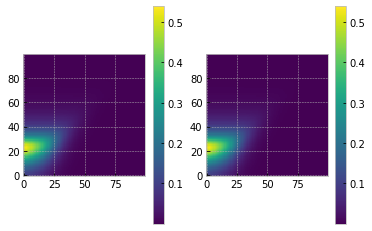

In [61]:
Na=100

xarrv=jnp.logspace(-1,3.3,Na)
xarr=xarrv[:,None]*jnp.ones((Na,Na))

aarrv=jnp.logspace(-1,3.3,Na)
aarr=aarrv[None,:]*jnp.ones((Na,Na))

def iH(a,x):
    z=x+(1j)*a
    w = sc_wofz(z)
    return w.imag

vimwofz=vmap(imwofz,(0,None),0)
def fvimwofz(a):
    return vimwofz(xarrv,a)
vfvimwofz=vmap(fvimwofz,0,0)

fig=plt.figure()
ax=fig.add_subplot(121)
c=ax.imshow(iH(aarr,xarr))
plt.colorbar(c)
plt.gca().invert_yaxis()
ax=fig.add_subplot(122)
c2=ax.imshow(vfvimwofz(aarrv).T)
plt.colorbar(c2)
plt.gca().invert_yaxis()

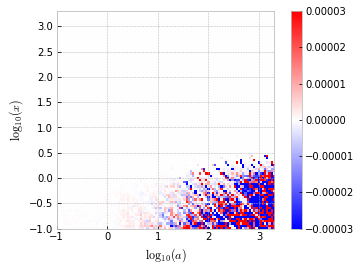

In [65]:
fig=plt.figure()
ax=fig.add_subplot(111)
#c=ax.imshow(np.log10(np.abs(H(aarr,xarr)-Tc(aarr,xarr))/H(aarr,xarr)),cmap="bwr",vmin=-1,vmax=1)
#c=ax.imshow(H(aarr,xarr))
#c=ax.imshow(vfvrewofz(aarrv))
c=ax.imshow((iH(aarr,xarr)-vfvimwofz(aarrv).T)/iH(aarr,xarr),vmin=-3.e-5,vmax=3.e-5,
            cmap="bwr",extent=([-1,3.3,3.3,-1]))
plt.ylabel("$\log_{10}(x)$")
plt.xlabel("$\log_{10}(a)$")
plt.colorbar(c)
plt.gca().invert_yaxis()

In [57]:
from jax import custom_vjp
from jax.interpreters.ad import defvjp

@custom_vjp
def h(x, y):
    """                                                                                    
    Params:                                                                             
        x: x < nend/2                                                                   
        y:                                                                              
                                                                                        
    Return:                                                                             
        f: Real(wofz(x+iy))                                                             
    """                                                                                 
    nend=4000                                                                           
    xy=x*y                                                                              
    xyp=xy/jnp.pi                                                                       
    exx=jnp.exp(-x*x)                                                                   
    f=exx*erfcx(y)*jnp.cos(2.0*xy)+x*jnp.sin(xy)/jnp.pi*exx*jnp.sinc(xyp)                                                            
    n=jnp.arange(1,nend+1)                                                              
    n2=n*n                                                                              
    vec0=1.0/(0.25*n2+ y*y)                                                             
    vec1=jnp.exp(-(0.25*n2+x*x))                                                        
    vec2=jnp.exp(-(0.5*n+x)*(0.5*n+x))                                                  
    vec3=jnp.exp(-(0.5*n-x)*(0.5*n-x))                                                  
    Sigma1=jnp.dot(vec0,vec1)
    Sigma2=jnp.dot(vec0,vec2)
    Sigma3=jnp.dot(vec0,vec3)
    f = f + 1.0/jnp.pi*(-y*jnp.cos(2.0*xy)*Sigma1 + 0.5*y*Sigma2 + 0.5*y*Sigma3)
    return f

#def h(x, y):
#    return np.sin(x) * y

def h_fwd(x, y):

    
    return h(x, y), (jnp.cos(x), jnp.sin(x), y)

def h_bwd(res, g):
    cos_x, sin_x, y = res # Gets residuals computed in f_fwd
    return (cos_x * g * y, sin_x * g)  # g* partial_x h(x,y), g* partial_y h(x,y)

h.defvjp(h_fwd, h_bwd)

NameError: name 'custom_jvp' is not defined